**ARTIFICIAL NEURAL NETWORK**

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.0


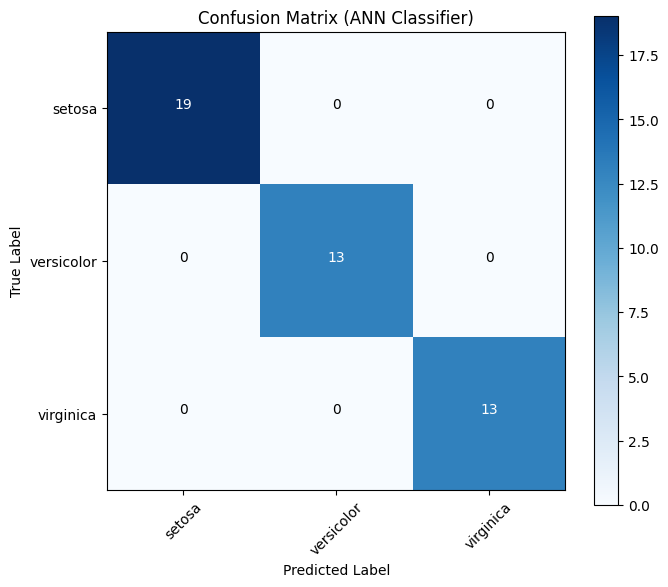

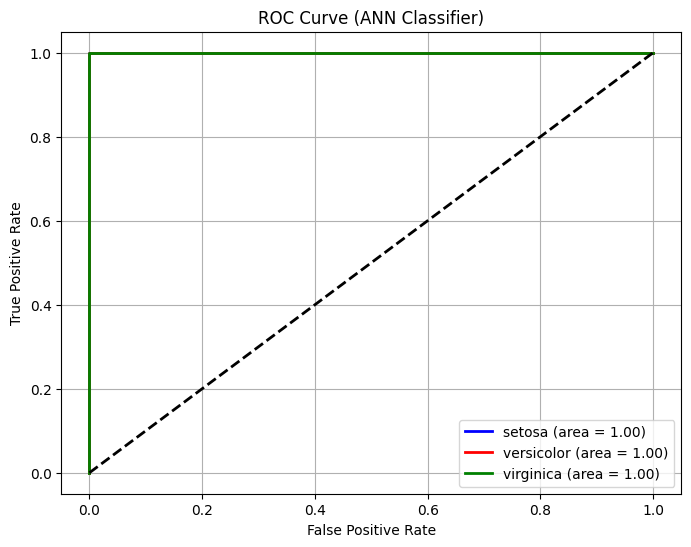

Cross-Validation Scores: [1.         1.         1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean CV Score: 0.9800000000000001


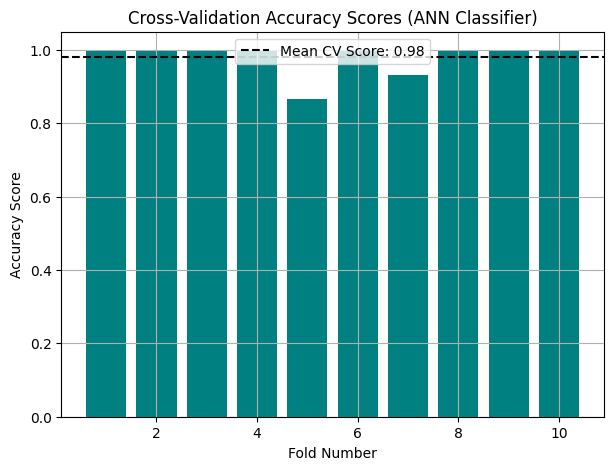

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an ANN classifier
model = MLPClassifier(max_iter=1000, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix with labels and numbers
plt.figure(figsize=(7, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ANN Classifier)')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Annotate each cell with the numeric value
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Binarize the output labels
y_score = model.predict_proba(X_test)  # Get predicted probabilities
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

# Calculate FPR, TPR, and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set axis limits
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ANN Classifier)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='teal')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (ANN Classifier)')
plt.legend()
plt.grid(True)
plt.show()
